In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

plt.style.use("seaborn-poster")

In [2]:
n = 10000
Days_list = (-3,-2,-1,0)
init=1

path = "results/"+str(n)+"allpc_days_"
df = pd.DataFrame()

for days in ("-3","-2","-1","0"):
    for detect in ("0.1","0.3","0.5"):
        for gens in ("1","2"):
            for file in glob.glob(path+"*"+days+"init_1_detect"+"*"+detect+"_gens"+"*"+gens+".csv"):
                temp = pd.read_csv(file)
                #temp['detect'] = float(detect)
                temp['N_Gens'] = int(gens)
                df = df.append(temp)
df.pc = ["$%s$" % x for x in df.pc]

df.head()

#df.N_Gens.unique()


,DAYS,actual_gen_times_mean,avg_daily_growth_rate,cases,detect,die_out,pc,secondary_cases_25,secondary_cases_75,secondary_cases_mean,sim,N_Gens
0,-3.0,3.487061,1.033235,16,0.1,True,$1.0$,0.0,0.0,1.132853,0,1
1,-3.0,3.487061,1.000000,6,0.1,True,$1.0$,0.0,0.0,1.132853,1,1
2,-3.0,3.487061,1.013607,9,0.1,True,$1.0$,0.0,0.0,1.132853,2,1
3,-3.0,3.487061,1.105623,122,0.1,False,$1.0$,0.0,0.0,1.132853,3,1
4,-3.0,3.487061,1.000000,6,0.1,True,$1.0$,0.0,0.0,1.132853,4,1


,DAYS,pc,N_Gens,die_out
1,-3.0,$0.5$,2,0.8563
3,-3.0,$0.75$,2,0.8652
5,-3.0,$0.9$,2,0.8732
7,-3.0,$1.0$,2,0.8775
9,-2.0,$0.5$,2,0.8499
11,-2.0,$0.75$,2,0.8582
13,-2.0,$0.9$,2,0.8661
15,-2.0,$1.0$,2,0.8678
0,-3.0,$0.5$,1,0.8495
2,-3.0,$0.75$,1,0.8589


8     0.8479
10    0.8561
12    0.8611
14    0.8635
Name: die_out, dtype: float64

,DAYS,pc,N_Gens,die_out,Baseline,Improvement,Scenario
1,-3.0,$0.5$,2,0.8563,0.8479,0.0084,"Days =-3.0, N_Gens=2"
3,-3.0,$0.75$,2,0.8652,0.8561,0.0091,"Days =-3.0, N_Gens=2"
5,-3.0,$0.9$,2,0.8732,0.8611,0.0121,"Days =-3.0, N_Gens=2"
7,-3.0,$1.0$,2,0.8775,0.8635,0.0140,"Days =-3.0, N_Gens=2"
9,-2.0,$0.5$,2,0.8499,0.8479,0.0020,"Days =-2.0, N_Gens=2"
11,-2.0,$0.75$,2,0.8582,0.8561,0.0021,"Days =-2.0, N_Gens=2"
13,-2.0,$0.9$,2,0.8661,0.8611,0.0050,"Days =-2.0, N_Gens=2"
15,-2.0,$1.0$,2,0.8678,0.8635,0.0043,"Days =-2.0, N_Gens=2"
0,-3.0,$0.5$,1,0.8495,0.8479,0.0016,"Days =-3.0, N_Gens=1"
2,-3.0,$0.75$,1,0.8589,0.8561,0.0028,"Days =-3.0, N_Gens=1"


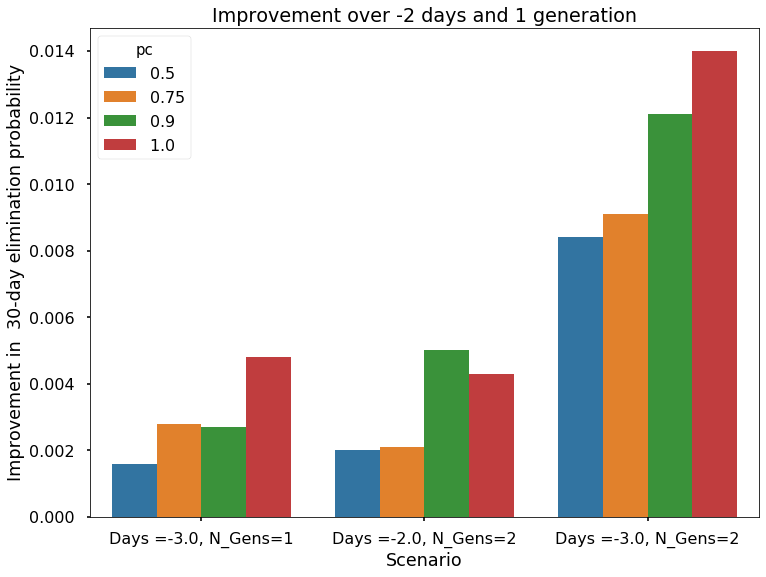

In [3]:
# Plot for detect = 0.3

detect = 0.3

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.3
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
display(mean_col)
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
display(baseline_probs)
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
#print(mean_col)

mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
#print(mean_col)


mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1']

display(mean_col)
# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1", "Days =-2.0, N_Gens=2", "Days =-3.0, N_Gens=2"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement over -2 days and 1 generation")
plt.show()

    DAYS      pc  N_Gens  die_out  Baseline  Improvement
1   -3.0   $0.5$       2   0.8384    0.8371       0.0013
3   -3.0  $0.75$       2   0.8462    0.8415       0.0047
5   -3.0   $0.9$       2   0.8549    0.8415       0.0134
7   -3.0   $1.0$       2   0.8586    0.8470       0.0116
9   -2.0   $0.5$       2   0.8375    0.8371       0.0004
11  -2.0  $0.75$       2   0.8445    0.8415       0.0030
13  -2.0   $0.9$       2   0.8503    0.8415       0.0088
15  -2.0   $1.0$       2   0.8538    0.8470       0.0068
0   -3.0   $0.5$       1   0.8359    0.8371      -0.0012
2   -3.0  $0.75$       1   0.8385    0.8415      -0.0030
4   -3.0   $0.9$       1   0.8452    0.8415       0.0037
6   -3.0   $1.0$       1   0.8488    0.8470       0.0018
8   -2.0   $0.5$       1   0.8371    0.8371       0.0000
10  -2.0  $0.75$       1   0.8415    0.8415       0.0000
12  -2.0   $0.9$       1   0.8415    0.8415       0.0000
14  -2.0   $1.0$       1   0.8470    0.8470       0.0000
    DAYS      pc  N_Gens  die_o

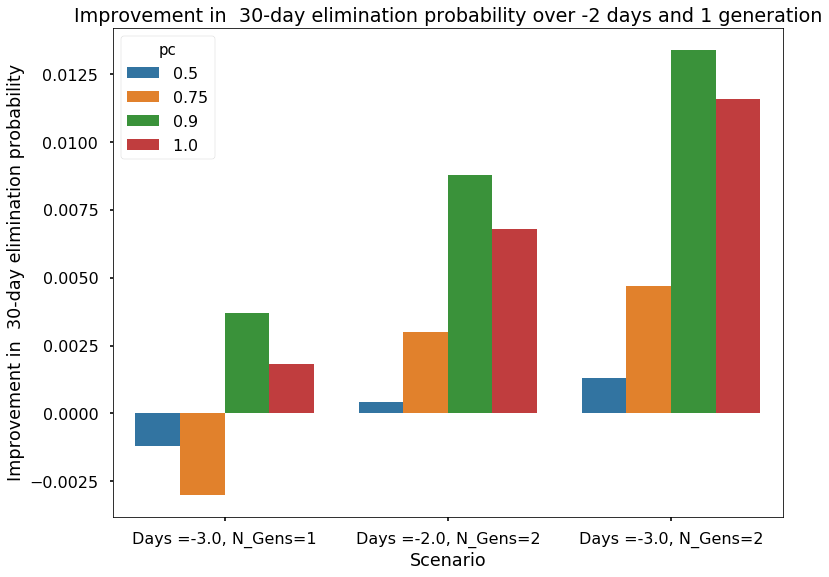

In [5]:
# Plot for detect = 0.1

detect = 0.1

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1", "Days =-2.0, N_Gens=2", "Days =-3.0, N_Gens=2"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")
plt.show()


    DAYS      pc  N_Gens  die_out  Baseline  Improvement
1   -3.0   $0.5$       2   0.8722    0.8630       0.0092
3   -3.0  $0.75$       2   0.8891    0.8728       0.0163
5   -3.0   $0.9$       2   0.8989    0.8793       0.0196
7   -3.0   $1.0$       2   0.9050    0.8866       0.0184
9   -2.0   $0.5$       2   0.8678    0.8630       0.0048
11  -2.0  $0.75$       2   0.8771    0.8728       0.0043
13  -2.0   $0.9$       2   0.8876    0.8793       0.0083
15  -2.0   $1.0$       2   0.8924    0.8866       0.0058
0   -3.0   $0.5$       1   0.8668    0.8630       0.0038
2   -3.0  $0.75$       1   0.8806    0.8728       0.0078
4   -3.0   $0.9$       1   0.8894    0.8793       0.0101
6   -3.0   $1.0$       1   0.8924    0.8866       0.0058
8   -2.0   $0.5$       1   0.8630    0.8630       0.0000
10  -2.0  $0.75$       1   0.8728    0.8728       0.0000
12  -2.0   $0.9$       1   0.8793    0.8793       0.0000
14  -2.0   $1.0$       1   0.8866    0.8866       0.0000
    DAYS      pc  N_Gens  die_o

Text(0.5, 1.0, 'Improvement in  30-day elimination probability over -2 days and 1 generation')

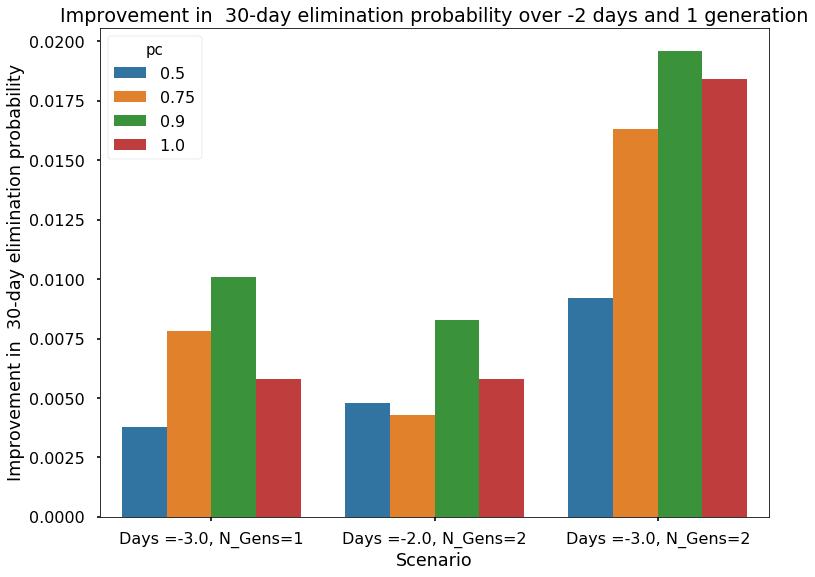

In [7]:
# Plot for detect = 0.1

detect = 0.5

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1", "Days =-2.0, N_Gens=2", "Days =-3.0, N_Gens=2"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")
